In [1]:
# MNIST data multi-layer feedforward neural network
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [ ]:
# Hyperparameter setting
input_size = 784    # Flatten 28*28 image
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                           transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                           transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size,
                                           shuffle=False)

In [3]:
example = iter(train_loader)
samples, labels = example.next()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


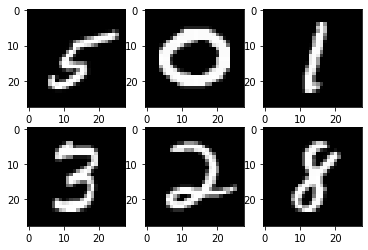

In [4]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [6]:
# Neural Network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        return out

In [7]:
model = NeuralNet(input_size, hidden_size, num_classes)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)

# Training Loop
num_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape Image 100*1*28*28 (batch*channel*size*size) --> 100*784(28*28)
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward Pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward Pass
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if (i+1) % 100 == 0:
            print(f'epoch: {epoch+1} / {num_epochs} | step: {i+1} / {num_total_steps} | loss: {loss.item():.4f}')

# Test and Evaluate
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        # torch.max: return value, index(class label)
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy: {acc}')


epoch: 1 / 2 | step: 100 / 600 | loss: 0.3140
epoch: 1 / 2 | step: 200 / 600 | loss: 0.3513
epoch: 1 / 2 | step: 300 / 600 | loss: 0.2252
epoch: 1 / 2 | step: 400 / 600 | loss: 0.3885
epoch: 1 / 2 | step: 500 / 600 | loss: 0.2143
epoch: 1 / 2 | step: 600 / 600 | loss: 0.2361
epoch: 2 / 2 | step: 100 / 600 | loss: 0.1673
epoch: 2 / 2 | step: 200 / 600 | loss: 0.1418
epoch: 2 / 2 | step: 300 / 600 | loss: 0.1842
epoch: 2 / 2 | step: 400 / 600 | loss: 0.2018
epoch: 2 / 2 | step: 500 / 600 | loss: 0.0871
epoch: 2 / 2 | step: 600 / 600 | loss: 0.1482
Accuracy: 95.29
